In [1]:
import numpy as np
from itertools import combinations
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import sys
sys.path.append('../scores')
from interactions import *
from pdpbox import pdp
import pandas as pd
from scipy.stats import random_correlation
from copy import deepcopy
from os.path import join as oj
from tqdm import tqdm
import pickle as pkl
import seaborn as sns
from run_sim import *

# analyze curves

**load and calculate stats**

In [39]:
curves = pkl.load(open(oj(out_dir, 'curves_1d.pkl'), "rb"))
mse_dac, mse_pdp = [], []
corr_dac, corr_pdp = [], []
num_vars = 10
for i in range(num_vars):
    curves_i = curves[i]
    exp = curves_i['exp']
    dac = curves_i['dac']
    pdp_xi = curves_i['pdp']
    mse_dac.append(np.mean((exp - dac) ** 2))
    mse_pdp.append(np.mean((exp - pdp_xi) ** 2))
    corr_dac.append(np.corrcoef(dac, exp)[0, 1])
    corr_pdp.append(np.corrcoef(pdp_xi, exp)[0, 1])

**plot results**

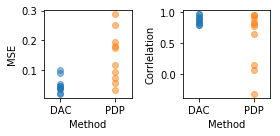

In [57]:
plt.figure(figsize=(4, 2))
R, C = 1, 2
plt.subplot(R, C, 1)
plt.plot([0] * num_vars, mse_dac, 'o', alpha=0.5)
plt.plot([1] * num_vars, mse_pdp, 'o', alpha=0.5)
plt.ylabel('MSE')
plt.xticks([0, 1], ['DAC', 'PDP'])
plt.xlim((-0.3, 1.3))
plt.xlabel('Method')


plt.subplot(R, C, 2)
plt.plot([0] * num_vars, corr_dac, 'o', alpha=0.5)
plt.plot([1] * num_vars, corr_pdp, 'o', alpha=0.5)
plt.ylabel('Corrlelation')
plt.xticks([0, 1], ['DAC', 'PDP'])
plt.xlim((-0.3, 1.3))
plt.xlabel('Method')

plt.tight_layout()
plt.savefig('sim_figs/mse.pdf')
plt.show()

**look at curves**

In [ ]:
num_vars = 10
for i in range(num_vars):
    curves_i = curves[i]
    plt.plot(curves_i['exp'], label='gt')
    plt.plot(curves_i['dac'], label='dac')
    plt.plot(curves_i['pdp'], label='pdp')
    plt.legend()
    plt.show()